In [5]:
# Importing required libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pickle

In [6]:
# Upload the file from your local machine
uploaded = files.upload()

# Display uploaded file names (you'll need to use the exact file name that gets uploaded)
print(uploaded)

# Use the uploaded file name to load it into a pandas DataFrame
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

# Display the first few rows to confirm the data is loaded correctly
df.head()




Saving Algerian_forest_fires_cleaned.csv to Algerian_forest_fires_cleaned.csv
{'Algerian_forest_fires_cleaned.csv': b'day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region\n1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire   ,0\n2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire   ,0\n3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire   ,0\n4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire   ,0\n5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire   ,0\n6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire   ,0\n7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire   ,0\n8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire   ,0\n9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire   ,0\n10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire   ,0\n11,6,2012,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,fire   ,0\n12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,fire   ,0\n13,6,2012,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,not fire  

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
# Check for missing values in the dataset
print("Missing values in dataset:\n", df.isnull().sum())


Missing values in dataset:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [9]:
# Now you can describe the dataset
print(df.describe())


              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606 

**DATA PROCESSING AND CLEANING**


In [10]:
# Handling missing data if present
df.isnull().sum()  # Check for null values

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [11]:
# Checking NaN data in our dataset
df.isna().value_counts()

,,,,,,,,,,,,,,,count
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,243


In [12]:
# Check for duplicate
df.duplicated().sum() # This will tell us how many duplicate rows exists in the dataset.

0

In [13]:
# Drop irrelevant columns
df.drop(columns=['day', 'month', 'year'], inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [14]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [15]:
# Encoding of categories in Classes into 0(Not Fire) and 1(Fire)

df['Classes'] =np.where(df['Classes'].str.contains('not fire'),0,1)

In [16]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [17]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [21]:
# Feature selection: assuming 'FWI' is the target variable
X = df.drop(columns=['FWI'])  # Replace 'data' with 'df'
y = df['FWI']  # 'FWI' is the target variable

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-26-00d034954230>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Classes', palette='Set1')


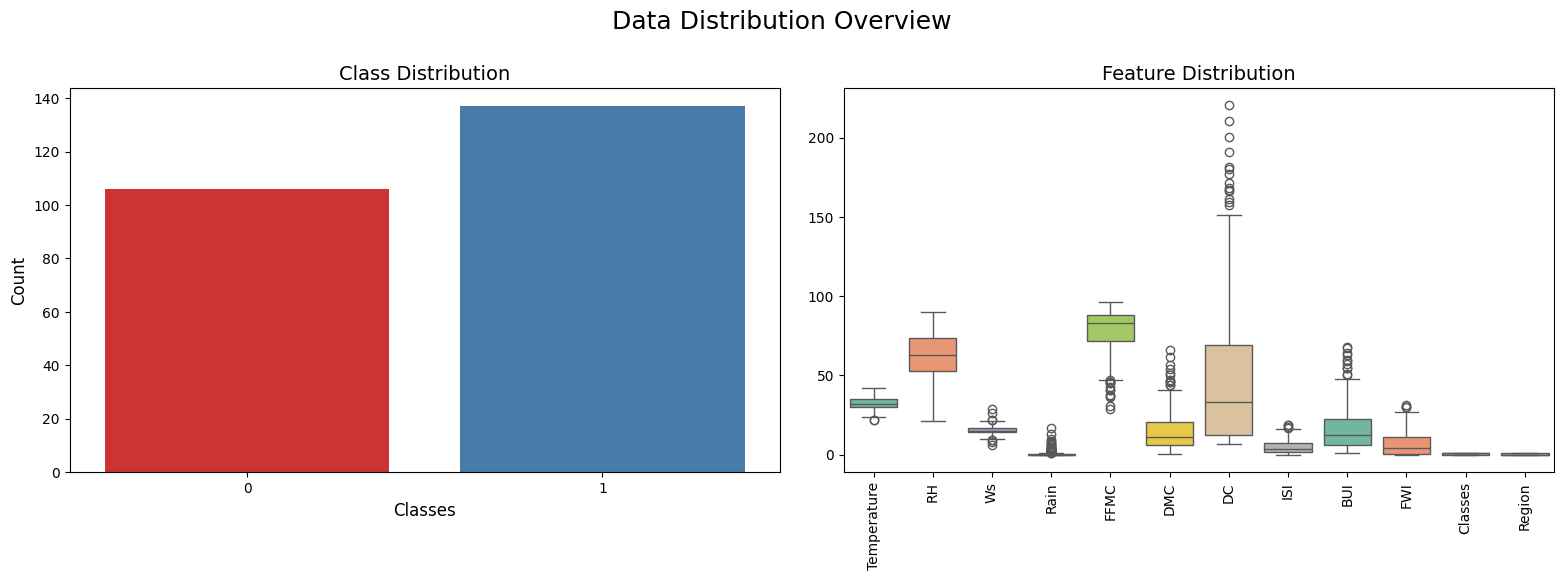

In [26]:
# Set the figure size and combined title
plt.figure(figsize=(16, 6))  # Increased width for clearer separation
plt.suptitle('Data Distribution Overview', fontsize=18)

# Plot the class distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Classes', palette='Set1')
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot the feature distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df, palette='Set2')
plt.title('Feature Distribution', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout and spacing for clarity
plt.tight_layout(pad=2.0)  # Increase padding between plots
plt.subplots_adjust(top=0.85)  # Adjust top spacing to fit the suptitle
plt.show()

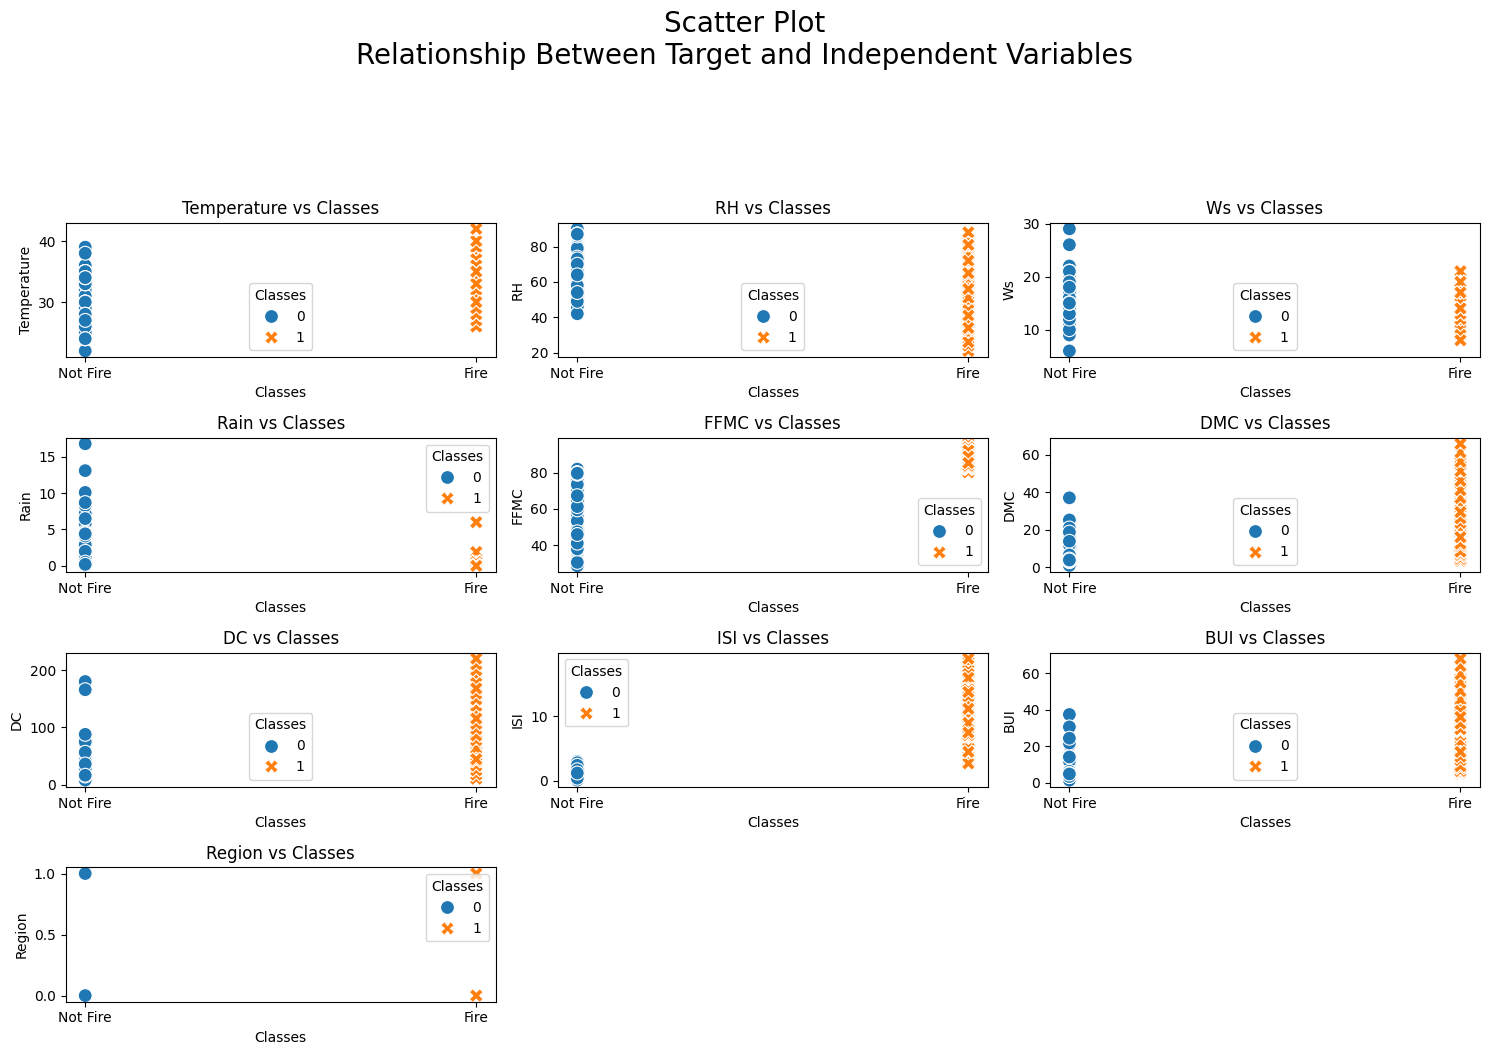

In [27]:
# Set the figure size and main title
plt.figure(figsize=(15, 10))
plt.suptitle('Scatter Plot\nRelationship Between Target and Independent Variables', fontsize=20, alpha=1, y=1.05)

# Exclude the 'FWI' and 'Classes' columns from the features
features = df.columns.drop(['FWI', 'Classes'])

# Loop through the features and create scatter plots
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    # Use a scatter plot with hue set to 'Classes'
    sns.scatterplot(x='Classes', y=feature, data=df, palette=['#1f77b4', '#ff7f0e'],
                    hue='Classes', style='Classes', s=100)  # s controls the size of the points
    plt.xticks([0, 1], ['Not Fire', 'Fire'])  # Set the x-axis labels
    plt.title(f'{feature} vs Classes', fontsize=12)  # Set individual plot titles

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

<Axes: >

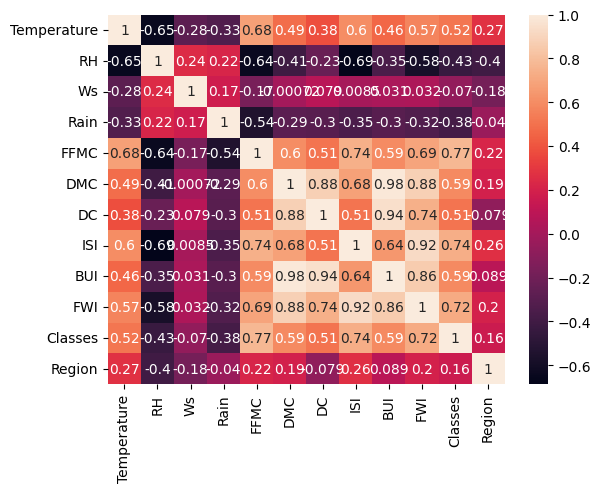

In [28]:
# Plot relation between target and independent variable (Heat Map)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [29]:
X = df.drop(['FWI'], axis=1)
Y = df['FWI']

In [30]:
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Multiple Linear Regression with cross validation**

In [36]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = linear_model.predict(x_train_scaled)
y_test_pred = linear_model.predict(x_test_scaled)

# Cross-Validation
cv_scores = cross_val_score(linear_model, x_train_scaled, y_train, cv=5)
print("Linear Regression - CV Mean Score:", np.mean(cv_scores))

# Print outputs
print("Linear Regression - Train MSE:", mean_squared_error(y_train, y_train_pred),
      "Train R²:", r2_score(y_train, y_train_pred),
      "Train MAE:", mean_absolute_error(y_train, y_train_pred))  # MAE for training set

print("Linear Regression - Test MSE:", mean_squared_error(y_test, y_test_pred),
      "Test R²:", r2_score(y_test, y_test_pred),
      "Test MAE:", mean_absolute_error(y_test, y_test_pred))  # MAE for test set

Linear Regression - CV Mean Score: 0.9550642876871317
Linear Regression - Train MSE: 1.5922515862521087 Train R²: 0.9737558301667233 Train MAE: 0.6764092608548995
Linear Regression - Test MSE: 0.33231115384863824 Test R²: 0.9890356825759857 Test MAE: 0.4267520614689853


**Polynomial Regression with Cross-Validation**

In [37]:
# Polynomial Features
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train_scaled)
x_test_poly = poly_features.transform(x_test_scaled)

# Fit the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# Predictions
y_train_poly_pred = poly_model.predict(x_train_poly)
y_test_poly_pred = poly_model.predict(x_test_poly)

# Cross-Validation
cv_poly_scores = cross_val_score(poly_model, x_train_poly, y_train, cv=5)
print("Polynomial Regression - CV Mean Score:", np.mean(cv_poly_scores))

# Print outputs
print("Polynomial Regression - Train MSE:", mean_squared_error(y_train, y_train_poly_pred),
      "Train R²:", r2_score(y_train, y_train_poly_pred))
print("Polynomial Regression - Test MSE:", mean_squared_error(y_test, y_test_poly_pred),
      "Test R²:", r2_score(y_test, y_test_poly_pred))

Polynomial Regression - CV Mean Score: 0.9861736676980168
Polynomial Regression - Train MSE: 0.01945472678585014 Train R²: 0.9996793388945339
Polynomial Regression - Test MSE: 0.2469968629163976 Test R²: 0.9918505533853232


**Regularization Models (Lasso and Ridge) with Cross-Validation**

**Fit, Evaluate, and Cross-Validate Lasso Regression**

In [38]:
# Lasso Regression with Hyperparameter Tuning
lasso_model = Lasso()
lasso_params = {'alpha': np.logspace(-4, 4, 10)}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)
lasso_grid.fit(x_train_scaled, y_train)

# Best Alpha and Predictions
print("Best Lasso Alpha:", lasso_grid.best_params_['alpha'])
y_test_lasso_pred = lasso_grid.predict(x_test_scaled)

# Cross-Validation for Lasso
lasso_cv_scores = cross_val_score(lasso_grid.best_estimator_, x_train_scaled, y_train, cv=5)
print("Lasso Regression - CV Mean Score:", np.mean(lasso_cv_scores))

# Print outputs
print("Lasso Regression - Test MSE:", mean_squared_error(y_test, y_test_lasso_pred),
      "Test R²:", r2_score(y_test, y_test_lasso_pred))

Best Lasso Alpha: 0.046415888336127774
Lasso Regression - CV Mean Score: 0.9563677218433565
Lasso Regression - Test MSE: 0.37899972317569935 Test R²: 0.9874952338482004


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e+02, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+02, tolerance: 9.264e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.997e+01, tolerance: 9.824e

**Fit, Evaluate, and Cross-Validate Ridge Regression**

In [39]:
# Ridge Regression with Hyperparameter Tuning
ridge_model = Ridge()
ridge_params = {'alpha': np.logspace(-4, 4, 10)}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)
ridge_grid.fit(x_train_scaled, y_train)

# Best Alpha and Predictions
print("Best Ridge Alpha:", ridge_grid.best_params_['alpha'])
y_test_ridge_pred = ridge_grid.predict(x_test_scaled)

# Cross-Validation for Ridge
ridge_cv_scores = cross_val_score(ridge_grid.best_estimator_, x_train_scaled, y_train, cv=5)
print("Ridge Regression - CV Mean Score:", np.mean(ridge_cv_scores))

# Print outputs
print("Ridge Regression - Test MSE:", mean_squared_error(y_test, y_test_ridge_pred),
      "Test R²:", r2_score(y_test, y_test_ridge_pred))

Best Ridge Alpha: 2.782559402207126
Ridge Regression - CV Mean Score: 0.9571504045967764
Ridge Regression - Test MSE: 0.5337643268858691 Test R²: 0.9823889103877096


**Saving and Testing the Model**

In [40]:
import pickle

# Save the scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Save the Linear Regression model
linreg_filename = 'linear_model.pkl'
with open(linreg_filename, 'wb') as file:
    pickle.dump(linear_model, file)

# Save the Lasso Regression model
lasso_filename = 'lasso_model.pkl'
with open(lasso_filename, 'wb') as file:
    pickle.dump(lasso_grid, file)

# Save the Ridge Regression model
ridge_filename = 'ridge_model.pkl'
with open(ridge_filename, 'wb') as file:
    pickle.dump(ridge_grid, file)

In [41]:
# Load the scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'rb') as file:
    loaded_scaler = pickle.load(file)

# Load the Linear Regression model
linreg_filename = 'linear_model.pkl'
with open(linreg_filename, 'rb') as file:
    loaded_linear_model = pickle.load(file)

# Load the Lasso Regression model
lasso_filename = 'lasso_model.pkl'
with open(lasso_filename, 'rb') as file:
    loaded_lasso_model = pickle.load(file)

# Load the Ridge Regression model
ridge_filename = 'ridge_model.pkl'
with open(ridge_filename, 'rb') as file:
    loaded_ridge_model = pickle.load(file)

In [42]:
# Define new unseen data with all necessary features
new_data = pd.DataFrame({
    'Temperature': [20],
    'RH': [45],
    'Ws': [20],
    'Rain': [0.9],
    'FFMC': [85],
    'DMC': [6],
    'DC': [8],
    'ISI': [5],
    'BUI': [15],
    'Classes': [0],
    'Region': [0]
})

x_train.columns

# Scale the new data
new_data_scaled = loaded_scaler.transform(new_data)

# Predict with all models
linreg_pred = loaded_linear_model.predict(new_data_scaled)
lasso_pred = loaded_lasso_model.predict(new_data_scaled)
ridge_pred = loaded_ridge_model.predict(new_data_scaled)


# Predictions
print(f"Linear Regression Prediction for FWI: {linreg_pred[0]}")
print(f"Lasso Regression Prediction for FWI: {lasso_pred[0]}")
print(f"Ridge Regression Prediction for FWI: {ridge_pred[0]}")

Linear Regression Prediction for FWI: 6.278384883144614
Lasso Regression Prediction for FWI: 5.981117325167281
Ridge Regression Prediction for FWI: 5.404275877478707
